# Administración Financiera Internacional
## Ejercicios
## Iván de Luna Aldape

## Ejercicios de coberturas

### Riesgos lineales - Hedge Ratio Óptimo

Existe el concepto del hedge ratio para determinar la cantidad de la posición de contratos de futuro o forwards en relación al tamapo de la exposición.

$$
h = -\rho \frac{\sigma_{S}}{\sigma_{F}}
$$

en donde $\sigma_{s}$ y $\sigma_{f}$ son las desviaciones estándar del valor que vamos a cubrir, $S$, y el del futuro o forward $F$ y h es el hedge ratio que tiene la mínima varianza.

Una aerolínea necesita comprar 10,000 toneladas métricas de combustible para jet en 3 meses. Quiere cubrirse sobre un alza de precios usando contratos de futuro.

Esto puede hacerlo mediante coberturas de combustible para calefacción en el NYMEX. El valor nocional del contrato es por 42,000 galones, y el precio actual del combustible para jet es de $ 277 por tonelada métrica. El precio del futuro del combustible para calefacción es de $0.6903 por galón.

Las desviaciones estándar del cmabio en el precio en tres meses se calculan en 21.17% y de los futuros en 18.59% con una correlación de 0.8243

En este caso tenemos:

- Comprar 10,000 toneladas métricas de combustible
- Tiempo 3 meses
- Futuro de combustible para calefacción
- Notional del Futuro: 42,000 galones
- Precio spot del combustible de jet: $277
- Precio del futuro: $0.6903 galón

- $\sigma_{s} = 21.17$

- $\sigma_{f} = 18.59$

- $\rho_{sf} = 0.8243$

1. Calcular el valor nocional y la desviación estándar del combustible sin cobertura.

In [1]:
# Empezamos por declarar variables
q_s = 10000 # toneladas métricas
q_f = 42000 # cantida de futuro
px_spot = 277 # precio por galón
px_futuro = 0.6903 # precio contrato
sigma_s = 0.2117 # s.d. spot
sigma_f = 0.1859 # s.d. futuro
rho_sf = 0.8243 # Correlación 

Determinamos la cantidad nocional de S

In [2]:
q_cantidad = q_s*px_spot
print("La cantidad que necesitamos es de: ", q_cantidad)

La cantidad que necesitamos es de:  2770000


La desviación estándar está dada por 21.17%, ¿pero en precio cúanto es?

In [4]:
sigma_qs = q_cantidad * sigma_s
print("La variación en precio es de: ", sigma_qs)

La variación en precio es de:  586409.0


y para el caso del futuro sería:

In [7]:
sigma_f_usd = sigma_f * px_futuro * q_f
print("La variación del futuro es de: ", round(sigma_f_usd,2))

La variación del futuro es de:  5389.72


y el nocional que se requiere es de:

In [9]:
print("Valor del nocional: ", round(px_futuro * q_f, 2))

Valor del nocional:  28992.6


b. Determinar la cantidad óptima de contratos de futuro para vender o comprar.

En este caso hay que cubrirse para un pago, por lo cual habría que comprar futuros.

Primero estimamos $\beta$ de la siguiente manera:

$$
\beta^* = \rho_{sf}\frac{\sigma_{s}}{\sigma_{f}}
$$

In [35]:
beta_sf = rho_sf * (sigma_s/sigma_f)
print("El hedge ratio óptimo es de: ", beta_sf)

El hedge ratio óptimo es de:  0.938699892415277


Dado que la cantidad de contratos se calcula como:

$$
N^{*} = \beta_{sf}\frac{Q_{s}*s}{Q_{f}*f}
$$

entonces, se requieren:

In [12]:
n_contratos = beta_sf*((q_s*px_spot)/(q_f*px_futuro))
print("Cantidad de contratos: ", round(n_contratos))

Cantidad de contratos:  90


c. Calcular la desviación estándar de la cobertura

En este caso primero hay que determinar la covarianza entre el precio spot y futuro, así como de los contratos:

In [13]:
sigma_sf = rho_sf * sigma_s * sigma_f
print("La covarianza entre spot y futuro es de: ", sigma_sf)

La covarianza entre spot y futuro es de:  0.032440351229


En términos de dolares sería:

In [14]:
sigma_sf_usd = sigma_sf * q_cantidad *(px_futuro*q_f)
print("La covarianza en dólares es de: ", sigma_sf_usd)

La covarianza en dólares es de:  2605268451.906078


Del inciso *a* tenemos que la volatilidad del nocional del spot es:

In [15]:
print(sigma_qs)

586409.0


para convertirlo en varianza:

In [16]:
var_qs = sigma_qs * sigma_qs
print("Varianza del nocional: ", var_qs)

Varianza del nocional:  343875515281.0


En el caso de la cobertura sería:

$$
\sigma_{S}^2-\frac{\sigma_{SF}^{2}}{\sigma_{F}^{2}}
$$

por lo cual:

In [38]:
var_cobertura = sigma_qs**2-(sigma_sf_usd/sigma_f_usd)**2
print(var_cobertura)

110222250414.01651


y regresándolo a desviación estándar / volatilidad, obtenemos que nuestra posición pasó de una desviación estándar de:

In [19]:
print(sigma_qs)

586409.0


a una de :

In [39]:
import numpy as np # Importamos la librería numpy para usar sqrt()
np.sqrt(var_cobertura)

331997.36507089407

para determinar la calidad de la cobertura $R^2$, en términos de cuánto se decrementó la varianza de la posición original:

$$
R^2 = \frac{(\sigma_s^2 - \sigma_v^2)}{\sigma_s^2}
$$

In [23]:
print("Calidad de la cobertura: ", 1 - var_cobertura/var_qs)

Calidad de la cobertura:  0.6794704899999998


Lo cual es similar al cuadrado del coeficiente de correlación $\rho_{sf}$ previamente obtenido:

$$
\sigma_v = \sigma_s\sqrt{1-R^2}
$$


In [24]:
rho_sf * rho_sf

0.67947049

### Uso de librerías

En este ejercicio vamos a bajar datos y graficarlos usando diversas librerías.

[*********************100%%**********************]  1 of 1 completed


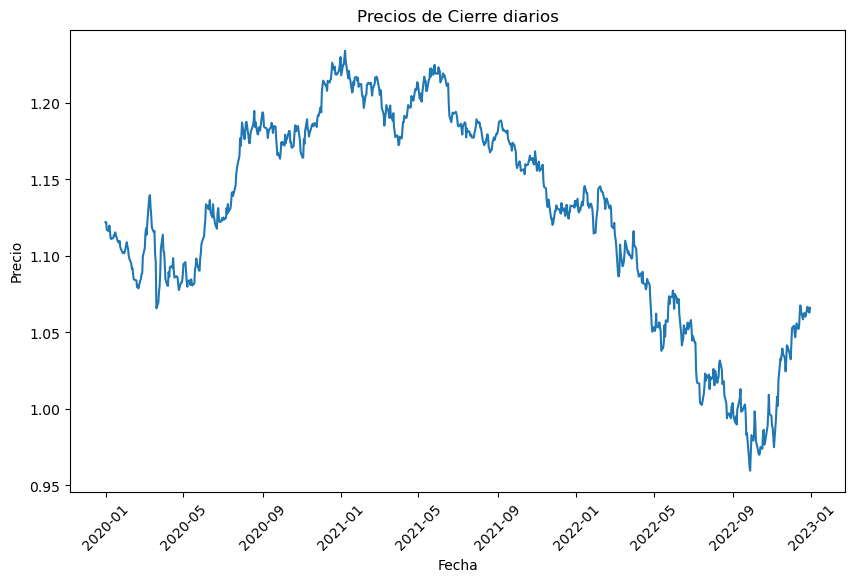

In [50]:
import yfinance as yf # para obtener datos
import pandas as pd # para manipular datos y dataframes
import seaborn as sns
import matplotlib.pyplot as plt # para graficar

# Dado que utilizamos Yahoo Finance, hay que buscar el ticker que usan
ticker = 'EURUSD%3DX'
# Vamos a bajar datos del 2020 al 2023
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# Nos quedamos solo con los datos de cierre
px_close = data['Close']

# Definmos el tamaño de la gráfica
plt.figure(figsize=(10,6))

# Graficamos usando seaborn
sns.lineplot(data=px_close)

# Agregamos titulos
plt.title('Precios de Cierre diarios')
plt.xlabel('Fecha')
plt.ylabel('Precio')

# Rotamos el eje x para mejor visualización
plt.xticks(rotation = 45)

# Mostramos la gráfica
plt.show()


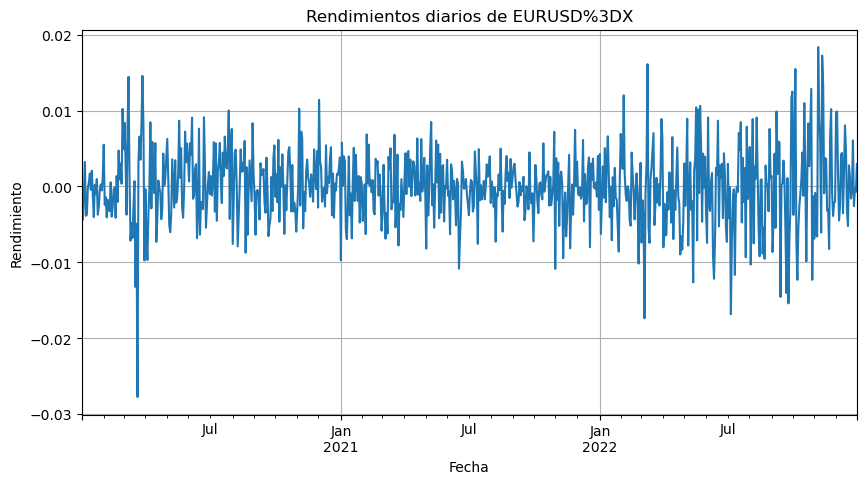

In [51]:
# Calculamos los rendimientos
rendimientos = px_close.pct_change().dropna()

# Graficamos usando matplot
plt.figure(figsize=(10, 5))
rendimientos.plot()
plt.title('Rendimientos diarios de ' + ticker)
plt.xlabel('Fecha')
plt.ylabel('Rendimiento')
plt.grid(True)
plt.show()

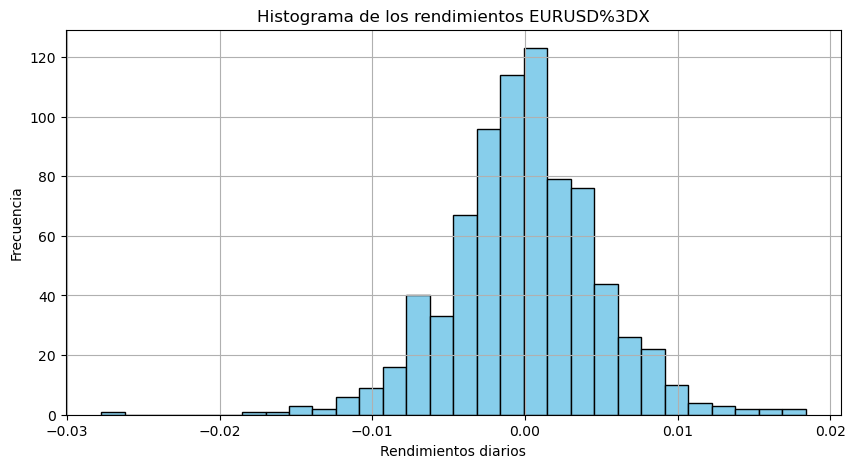

In [52]:
# Podemos graficar también un historgrama
plt.figure(figsize=(10,5))
plt.hist(rendimientos, bins = 30, color = 'skyblue', edgecolor='black')
plt.title('Histograma de los rendimientos ' + ticker)
plt.xlabel('Rendimientos diarios')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Ahora vamos a calcular el VaR y el CVar de los rendimientos:

In [42]:
# Primero estimamos $\mu$:
mu_r = rendimientos.mean()
# Luego sd:
sd_r = rendimientos.std()

# Usamos un intervalo de confianza:
conf = 0.95

# Calculamos Z que corresponde a nuestro nivel de confianza
z_score = np.percentile(rendimientos, 100*(1-conf))

# Calculamos el VaR
VaR = mu_r + z_score * sd_r
print(f"El Valor en Reisgo al {conf * 100:.2f}% de confianza: {VaR: .6f}")

El Valor en Reisgo al 95.00% de confianza: -0.000091


In [43]:
# Usando los mismos datos anteriores, podemos hacerlo más rápido
VaR = rendimientos.quantile(1 - conf)
CVaR = rendimientos[rendimientos <= VaR].mean()

print(f"El Conditional Value at Risk (CVaR) al {conf * 100:.2f}% de confianza: {CVaR:.6f}")

El Conditional Value at Risk (CVaR) al 95.00% de confianza: -0.010799


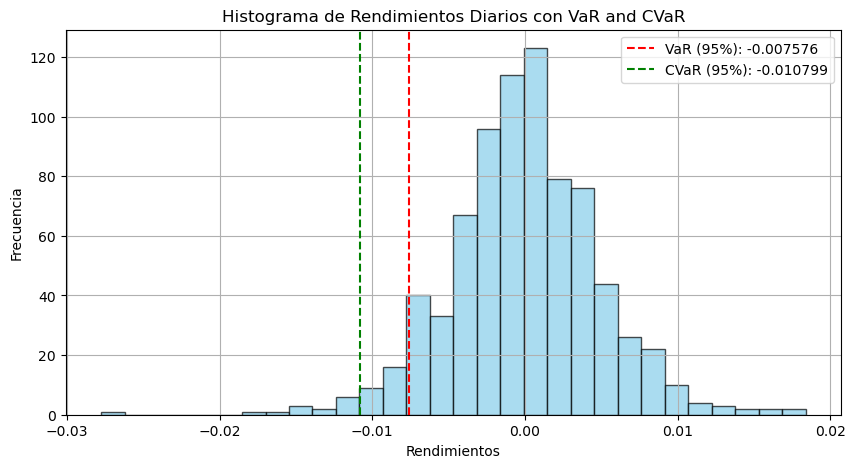

In [44]:
# Ahora vamos a graficar los resultados
plt.figure(figsize=(10, 5))
plt.hist(rendimientos, bins=30, color='skyblue', edgecolor='black', alpha=0.7)

# Agregar lineas verticales del VaR and CVaR 
plt.axvline(x=VaR, color='red', linestyle='--', label=f'VaR ({conf * 100:.0f}%): {VaR:.6f}')
plt.axvline(x=CVaR, color='green', linestyle='--', label=f'CVaR ({conf * 100:.0f}%): {CVaR:.6f}')

plt.title('Histograma de Rendimientos Diarios con VaR and CVaR')
plt.xlabel('Rendimientos')
plt.ylabel('Frecuencia')
plt.legend()
plt.grid(True)
plt.show()

Podemos utilizar método de Monte Carlo para simular el VaR y el CVaR

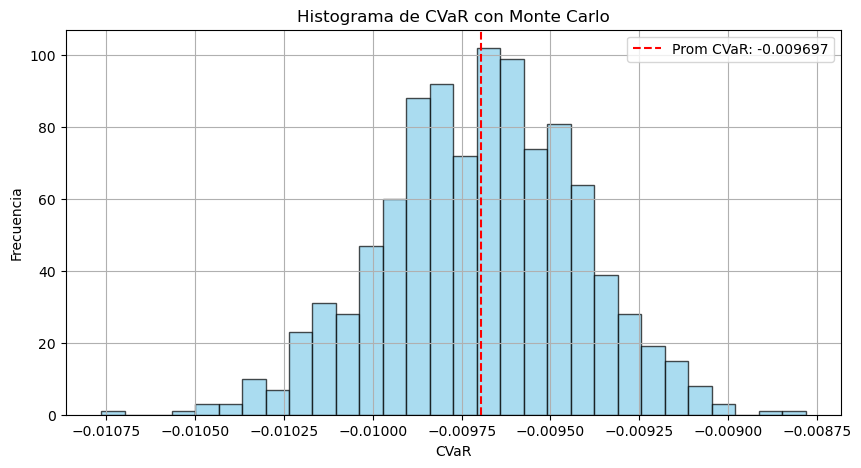

In [47]:
# Definimos los parámetros
num_sim = 1000 # Número de simulaciones
conf = 0.95 # Nivel de confianza
num_dias = len(rendimientos) # Número de días

# Calculamos el VaR usando percentiles para la referencia
VaR = rendimientos.quantile(1-conf)

# Hacemos un array para guardar los resultados del CVaR
CVaR_res = [] # Se inicializa en vacio

# Hacemos un for loop para el Monte Carlo

for _ in range(num_sim):
    # Se generan rendimientos para cada día
    sim_rend = np.random.normal(rendimientos.mean(), rendimientos.std(), num_dias)
    
    # Se calcula el CVaR de cada simulación, recordemos que usamos el VaR de referencia
    CVaR = np.mean(sim_rend[sim_rend <= VaR])
    
    # Guardamos el resultado en el array usando append()
    CVaR_res.append(CVaR)
    
# Graficamos los resultados
# Tamaño del gráfico
plt.figure(figsize=(10,5)) 
# Histograma con 30 bins
plt.hist(CVaR_res, bins = 30, color = 'skyblue', edgecolor='black', alpha=0.7)
# Agregamos una línea vertical con el valor promedio del CVaR
plt.axvline(x=np.mean(CVaR_res), color='red', linestyle='--', label=f'Prom CVaR: {np.mean(CVaR_res):.6f}')
# Agregamos título
plt.title('Histograma de CVaR con Monte Carlo')
# Nombre de los ejes
plt.xlabel('CVaR')
plt.ylabel('Frecuencia')
# Agregamos leyenda (color de la línea vertical y que significa)
plt.legend()
# Agregamos cuadrícula
plt.grid(True)
# Mostramos la gráfica
plt.show()

## Black Scholes y Merton
### Funciones

Ahora vamos a trabajar con funciones y métodos, que son una de las partes más importantes de programación.

En este caso vamos a trabajar con Opciones.

El modelo de Merton nos va a permitir visualizar el riesgo de default de una empresa de la siguiente forma:

- Consideramos que no existen costos de transacción 
- Se sigue la regla de absoluta prioridad

Entonces, consideremos una empresa con valor $V$ que solo tiene un bono $B$ con valor nominal de $K$. 

Si el valor de la empresa $V$ es mayor al del bono $B$, esta lo paga y todos felices, ¿qué pasa si $B > V$?

Primero determinamos que el valor de una acción en tiempo t es $S_{t}$, y este lo definiríamos como:

$$
S_{t} = \max (V_{t} - K, 0)
$$

recordemos de Contabilidad que el Activo = Pasivo + Capital, en este caso la empresa solo tiene un Bono, por lo cual:

$$
B_{t} = V_{t} - S_{t} = V_{t} - \max(V_t - K, 0) = \min(V_t, K)
$$

por lo tanto se puede decir que el valor de la acción (o de la empresa) trae implicito una probabilida de incumplimiento.


Vamos a valuar la acción.


Primero consideramos que no hay dividendos, entonces con la fórmula de Black-Scholes:

$$
S = Call = VN(d_{1}) - Ke^{-rt}N(d_{2})
$$

en este caso $d_{1}$ lo definimos como

$$
d_{1} = \frac{ln(V/Ke^{-rt})}{\sigma\sqrt{\tau}} + \frac{\sigma\sqrt\tau}{2}
$$

y $d_{2}$ sería:

$$
d_{2} = d1 - \sigma\sqrt\tau
$$

donde $\tau = T - t$ es el tiempo a la expiración, $r$ es la tasa libre de riesgo, y $\sigma$ la volatilidad de la acción. $N$ es la función de distribución acumulada. $d_{2}$ se puede interpretar como la probabilidad de que se ejerza la opción.

### Ejercicio

Se tiene una empresa con valor $V = \$100$, con un $\sigma_{v} = 20\%$, $\tau = 1$ año, la tasa libre de riesgo es $r = 10\%$ y un apalancamiento de $x = 0.9$.

Recordemos que el apalancamiento es la deuda/valor de la empresa, por lo tanto

$$
x = \frac{Ke^{-rt}}{V}
$$

a. ¿Cuánto vale S?

Recordemos que S se define como:

$$
S = Call = VN(d_{1}) - Ke^{-rt}N(d_{2})
$$

Primero hagamos $d_{1}$:

$$
d_{1} = \frac{ln(V/Ke^{-rt})}{\sigma\sqrt{\tau}} + \frac{\sigma\sqrt\tau}{2}
$$


In [62]:
from scipy.stats import norm
import numpy as np

In [68]:
def d_1(V, K, r, tau, sigma):
    return np.log(V/(K*np.exp(-r*tau)))/(sigma * np.sqrt(tau)) + (sigma * np.sqrt(tau))/2


ahora $d_2$

In [65]:
def d_2(d1, sigma, tau):
    return d1 - sigma*np.sqrt(tau)

ahora $S$:

In [72]:
def s_call(V, d1, d2, K, r, tau):
    return V*norm.cdf(d1) - K * np.exp(-r*tau)*norm.cdf(d2)

Ahora obtenemos los valores usando nuestras funciones, primero definimos variables:

In [57]:
V = 100
sigma = 0.20
tau = 1
r = 0.10
x = 0.9

¿Cómo obtenemos K? recordemos qeu si x es el apalancamiento (deuda/capital), entonces K la obtenemos:

In [58]:
K = 0.9 * V

y consideranco la tasa libre de riesgo

In [59]:
K = K * np.exp(r*tau)

ahora empezamos a usar nuestras funciones:

In [69]:
d1 = d_1(V, K, r, tau, sigma)
print(d1)

0.6268025782891317


luego d2

In [70]:
d2 = d_2(d1, sigma, tau)
print(d2)

0.42680257828913165


ahora S Call:

In [73]:
valor_s = s_call(V, d1, d2, K, r, tau)
print(valor_s)

13.589108116054803


Recordemos de contabilidad que Activo = Pasivo + Capital, por lo tanto el valor del Bono es:

In [74]:
B = V - valor_s
print(B)

86.4108918839452


si el bono originalmente esta en:

In [75]:
print(K)

99.46538262680829


El rendimiento considerando la tasa libre de riesgo es de:

In [77]:
print(np.log(K/B)/tau - r)

0.040695938993998926
